<a href="https://colab.research.google.com/github/UshaGayatri2020/DataScienceProjects/blob/main/ss.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [53]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

     |████████████████████████████████| 412.3MB 25kB/s 
     |████████████████████████████████| 512kB 34.5MB/s 
     |████████████████████████████████| 51kB 5.6MB/s 
     |████████████████████████████████| 3.8MB 27.6MB/s 
  Created wheel for gast: filename=gast-0.2.2-cp37-none-any.whl size=7540 sha256=6ff05b930b45eefb68204f661e516a1e03f46f4317f409343bbc7ff4b2f601ef
  Stored in directory: /root/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
Successfully built gast
ERROR: tensorflow-probability 0.12.1 has requirement gast>=0.3.2, but you'll have gast 0.2.2 which is incompatible.
  Found existing installation: tensorflow-estimator 2.4.0
    Uninstalling tensorflow-estimator-2.4.0:
      Successfully uninstalled tensorflow-estimator-2.4.0
  Found existing installation: gast 0.3.3
    Uninstalling gast-0.3.3:
      Successfully uninstalled gast-0.3.3
  Found existing installation: tensorboard 2.4.1
    Uninstalling tensorboard-2.4.1:
      Successfully uninsta

In [11]:
import cv2
import os

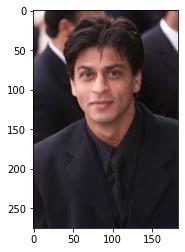

In [17]:
img = image.load_img('/content/CNN/Training/salman/1.jpg')
plt.imshow(img)

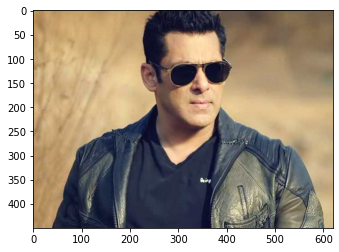

In [18]:
img = image.load_img('/content/CNN/Training/sharukh/1.jpg')
plt.imshow(img)

In [19]:
cv2.imread("/content/CNN/Training/sharukh/1.jpg").shape

(450, 620, 3)

In [20]:
cv2.imread("/content/CNN/Training/salman/1.jpg").shape

(275, 183, 3)

In [21]:
cv2.imread("/content/CNN/Training/salman/1.jpg")

array([[[219, 220, 224],
        [215, 216, 220],
        [209, 209, 215],
        ...,
        [108, 117, 180],
        [106, 115, 178],
        [106, 116, 176]],

       [[232, 233, 237],
        [228, 229, 233],
        [223, 223, 229],
        ...,
        [104, 113, 176],
        [103, 112, 175],
        [102, 112, 172]],

       [[241, 242, 246],
        [239, 240, 244],
        [234, 235, 239],
        ...,
        [102, 112, 172],
        [ 99, 109, 169],
        [ 99, 109, 169]],

       ...,

       [[ 42,  31,  34],
        [ 43,  32,  35],
        [ 44,  33,  36],
        ...,
        [ 36,  24,  24],
        [ 36,  24,  24],
        [ 36,  23,  25]],

       [[ 42,  31,  34],
        [ 43,  32,  35],
        [ 44,  33,  36],
        ...,
        [ 37,  25,  25],
        [ 36,  24,  24],
        [ 36,  23,  25]],

       [[ 42,  31,  34],
        [ 43,  32,  35],
        [ 44,  33,  36],
        ...,
        [ 37,  25,  25],
        [ 36,  24,  24],
        [ 36,  23,  25]]

In [22]:
train = ImageDataGenerator(rescale = 1/255)
validation = ImageDataGenerator(rescale = 1/255)

In [34]:
train_ds = train.flow_from_directory("/content/CNN/Training/",
                                     target_size=(200,200),
                                     batch_size=3,
                                     class_mode='binary')

Found 6 images belonging to 2 classes.


In [37]:
validation_ds = validation.flow_from_directory("/content/CNN/Validation/",
                                               target_size=(200,200),
                                               batch_size=3,
                                               class_mode='binary')

Found 6 images belonging to 2 classes.


In [39]:
validation_ds.class_indices

{'salman': 0, 'sharukh': 1}

In [36]:
!rm -rf /content/CNN/Validation/.ipynb_checkpoints

In [74]:
import numpy as np
from matplotlib import pyplot as plt
from tqdm import tqdm
import keras
from keras import backend as K
from keras import activations, initializers, regularizers, constraints, metrics
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential, Model
from keras.layers import (Dense, Dropout, Activation, Flatten, Reshape, Layer,
                          BatchNormalization, LocallyConnected2D,
                          ZeroPadding2D, Conv2D, MaxPooling2D, Conv2DTranspose,
                          GaussianNoise, UpSampling2D, Input)
#from keras.utils import conv_utils, multi_gpu_model
from keras.layers import Lambda
from keras.engine import Layer, InputSpec
#from keras.legacy import interfaces
!pip install tensorflow_gpu

     |████████████████████████████████| 394.3MB 31kB/s 
     |████████████████████████████████| 6.0MB 22.2MB/s 
     |████████████████████████████████| 471kB 27.4MB/s 
     |████████████████████████████████| 4.9MB 32.9MB/s 
ERROR: tensorflow 1.15.0 has requirement gast==0.2.2, but you'll have gast 0.3.3 which is incompatible.
ERROR: tensorflow 1.15.0 has requirement tensorboard<1.16.0,>=1.15.0, but you'll have tensorboard 2.5.0 which is incompatible.
ERROR: tensorflow 1.15.0 has requirement tensorflow-estimator==1.15.1, but you'll have tensorflow-estimator 2.4.0 which is incompatible.
  Found existing installation: gast 0.2.2
    Uninstalling gast-0.2.2:
      Successfully uninstalled gast-0.2.2
  Found existing installation: tensorboard 1.15.0
    Uninstalling tensorboard-1.15.0:
      Successfully uninstalled tensorboard-1.15.0
  Found existing installation: tensorflow-estimator 1.15.1
    Uninstalling tensorflow-estimator-1.15.1:
      Successfully uninstalled tensorflow-estimator-1

In [75]:
model = tf.keras.models.Sequential([tf.keras.layers.Conv2D(8,(3,3),
                                                           activation = 'relu',
                                                           input_shape = (200,200,3)),
                                      tf.keras.layers.MaxPool2D(2,2),  
                                                             
                                      tf.keras.layers.Conv2D(16,(3,3),activation = 'relu'),
                                      tf.keras.layers.MaxPool2D(2,2),
                                                             
                                      tf.keras.layers.Conv2D(32,(3,3),activation = 'relu'),
                                      tf.keras.layers.MaxPool2D(2,2),
                                                             
                                      tf.keras.layers.Flatten(),
                                      tf.keras.layers.Dropout(0.3),
                                      tf.keras.layers.Dense(128,activation = 'relu'),  
                                                             
                                      tf.keras.layers.Dense(1,activation = 'sigmoid')])

# New Section

In [76]:
model.compile(loss = 'binary_crossentropy',
              optimizer=RMSprop(lr=.001),
              metrics=['accuracy'])

In [80]:
mdl_fit = model.fit(train_ds,
                    steps_per_epoch =2,
                    epochs=70,
                    validation_data=validation_ds)

Epoch 1/70
2/2 [==============================] - ETA: 0s - loss: 0.8970 - accuracy: 0.5000

InvalidArgumentError: ignored

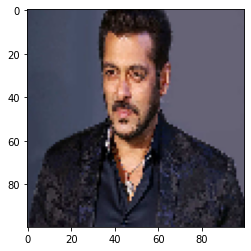

ValueError: ignored

In [81]:
dir_path='/content/CNN/Testing'
for i in os.listdir(dir_path):
    img = image.load_img(dir_path+"//"+i,target_size=(100,100))
    plt.imshow(img)
    plt.show()
    X = image.img_to_array(img)
    X = np.expand_dims(X,axis=0)
    images=np.vstack([X])
    val=model.predict(images)
    print(val)
    if val == 0:
        print('salman')
    else:
        print('sharukh')

In [83]:
img = image.load_img('/content/CNN/Testing/1.jpg',target_size=(200,200))

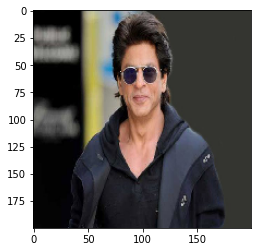

In [84]:
plt.imshow(img)
plt.show()

In [85]:
X = image.img_to_array(img)

In [86]:
X[0:5]

array([[[ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        ...,
        [52., 53., 48.],
        [52., 53., 48.],
        [52., 53., 48.]],

       [[ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        ...,
        [52., 53., 48.],
        [52., 53., 48.],
        [52., 53., 48.]],

       [[ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        ...,
        [52., 53., 48.],
        [52., 53., 48.],
        [52., 53., 48.]],

       [[ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        ...,
        [52., 53., 48.],
        [52., 53., 48.],
        [52., 53., 48.]],

       [[ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        ...,
        [52., 53., 48.],
        [52., 53., 48.],
        [52., 53., 48.]]], dtype=float32)

In [87]:
X = np.expand_dims(X,axis=0)

In [88]:
X[0:5]

array([[[[ 0.,  0.,  0.],
         [ 0.,  0.,  0.],
         [ 0.,  0.,  0.],
         ...,
         [52., 53., 48.],
         [52., 53., 48.],
         [52., 53., 48.]],

        [[ 0.,  0.,  0.],
         [ 0.,  0.,  0.],
         [ 0.,  0.,  0.],
         ...,
         [52., 53., 48.],
         [52., 53., 48.],
         [52., 53., 48.]],

        [[ 0.,  0.,  0.],
         [ 0.,  0.,  0.],
         [ 0.,  0.,  0.],
         ...,
         [52., 53., 48.],
         [52., 53., 48.],
         [52., 53., 48.]],

        ...,

        [[ 6.,  6.,  6.],
         [ 6.,  6.,  6.],
         [ 6.,  6.,  6.],
         ...,
         [52., 53., 48.],
         [52., 53., 48.],
         [52., 53., 48.]],

        [[ 6.,  6.,  6.],
         [ 6.,  6.,  6.],
         [ 6.,  6.,  6.],
         ...,
         [52., 53., 48.],
         [52., 53., 48.],
         [52., 53., 48.]],

        [[ 6.,  6.,  6.],
         [ 6.,  6.,  6.],
         [ 6.,  6.,  6.],
         ...,
         [52., 53., 48.],
        

In [89]:
images=np.vstack([X])
images

array([[[[ 0.,  0.,  0.],
         [ 0.,  0.,  0.],
         [ 0.,  0.,  0.],
         ...,
         [52., 53., 48.],
         [52., 53., 48.],
         [52., 53., 48.]],

        [[ 0.,  0.,  0.],
         [ 0.,  0.,  0.],
         [ 0.,  0.,  0.],
         ...,
         [52., 53., 48.],
         [52., 53., 48.],
         [52., 53., 48.]],

        [[ 0.,  0.,  0.],
         [ 0.,  0.,  0.],
         [ 0.,  0.,  0.],
         ...,
         [52., 53., 48.],
         [52., 53., 48.],
         [52., 53., 48.]],

        ...,

        [[ 6.,  6.,  6.],
         [ 6.,  6.,  6.],
         [ 6.,  6.,  6.],
         ...,
         [52., 53., 48.],
         [52., 53., 48.],
         [52., 53., 48.]],

        [[ 6.,  6.,  6.],
         [ 6.,  6.,  6.],
         [ 6.,  6.,  6.],
         ...,
         [52., 53., 48.],
         [52., 53., 48.],
         [52., 53., 48.]],

        [[ 6.,  6.,  6.],
         [ 6.,  6.,  6.],
         [ 6.,  6.,  6.],
         ...,
         [52., 53., 48.],
        